# Tugas: Clustering (due date: 13 Juni 2023)

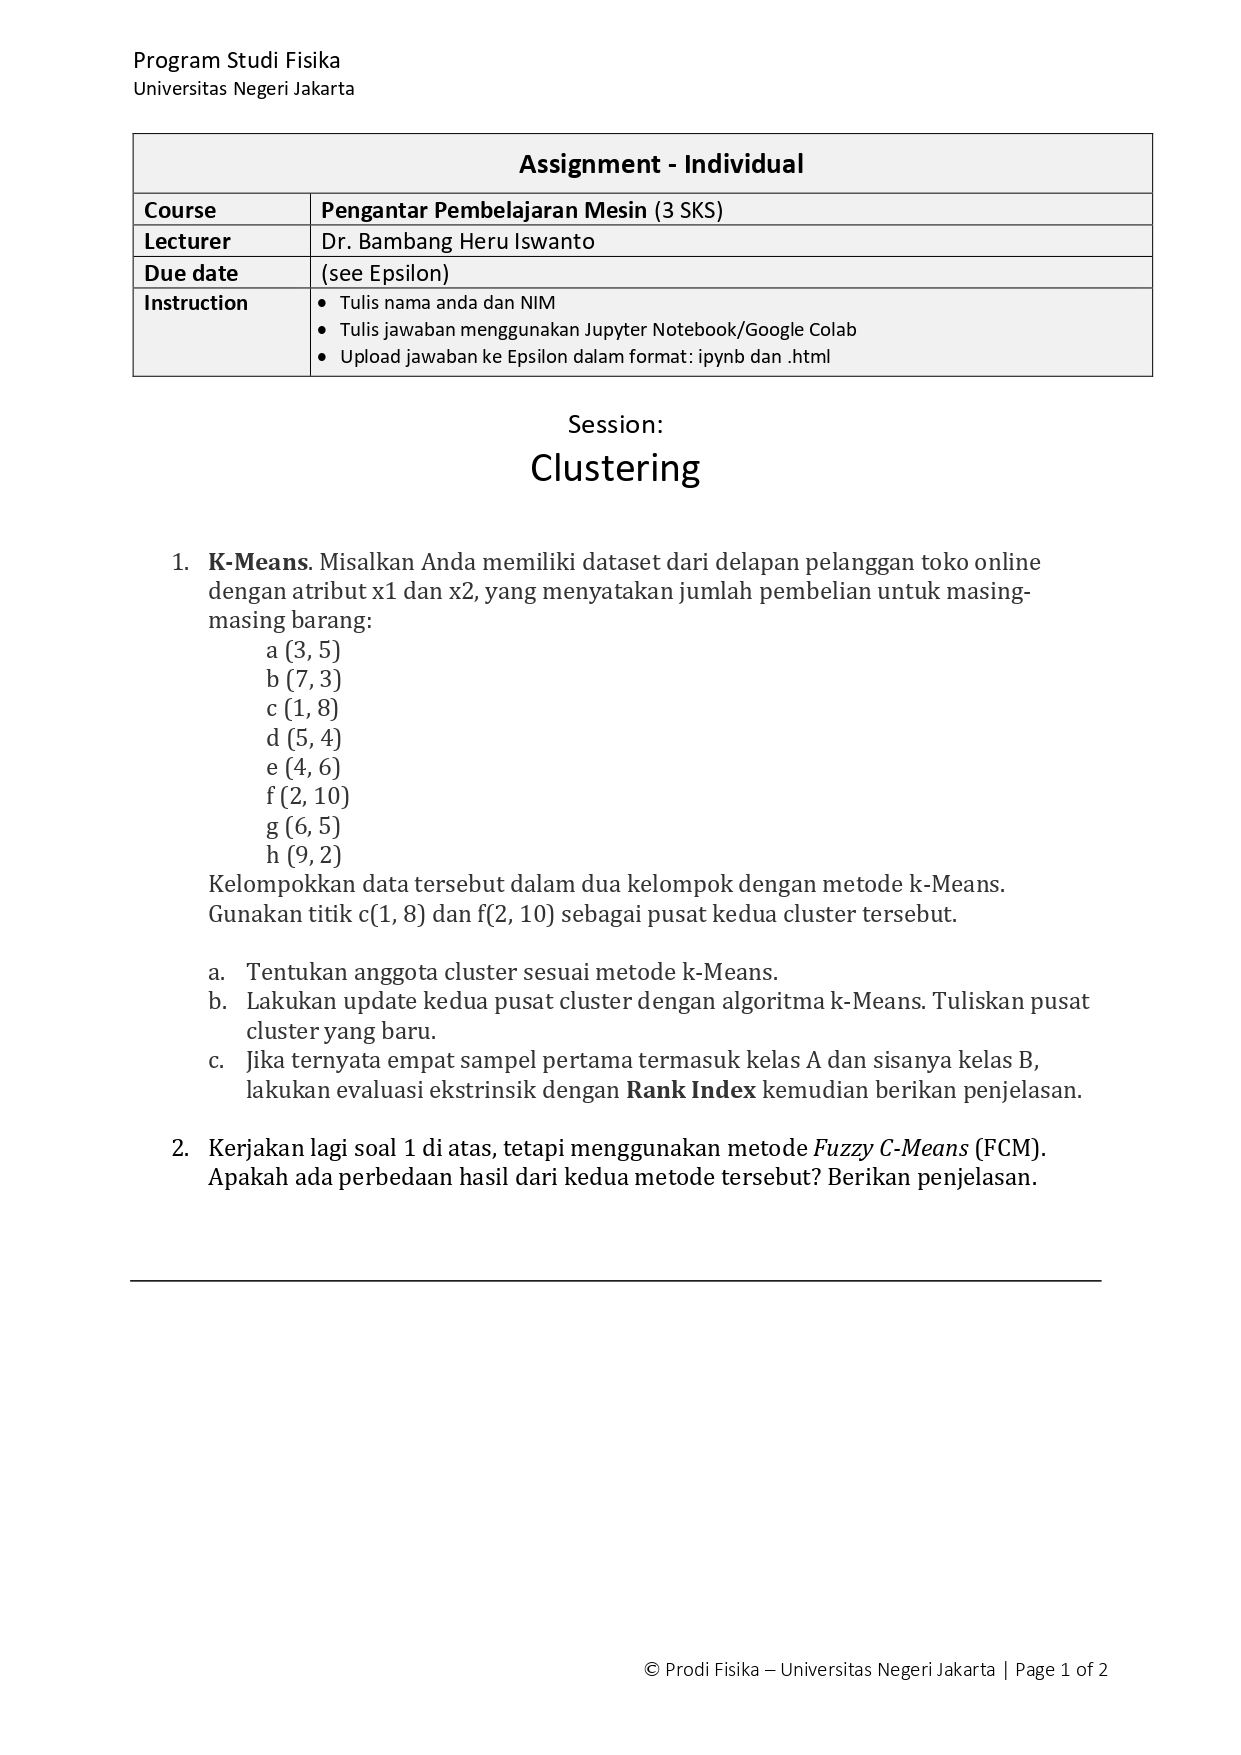

- Nama           : Muhammad Rizky Anugrah
- NIM            : 1306620089
- Kelas          : Fisika - B
- Angkatan       : 2020
- Dosen Pengampu : Dr.rer.nat. Bambang Heru Iswanto

## IMPORT

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import math
import seaborn as sns
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

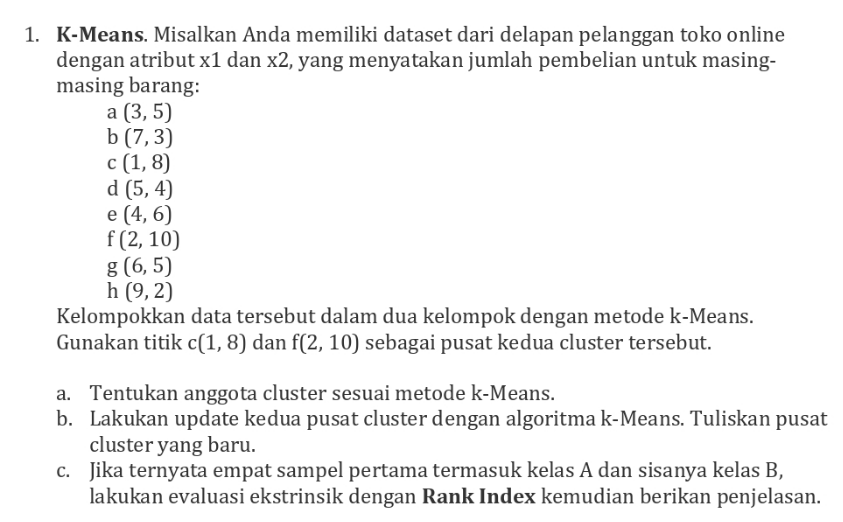

In [256]:
x1 = np.array([3, 7, 1, 5, 4, 2, 6, 9])
x2 = np.array([5, 3, 8, 4, 6, 10, 5, 2])

X = np.column_stack((x1, x2))  # Menggabungkan x1 dan x2 menjadi X

print("X:")
print(X)

X:
[[ 3  5]
 [ 7  3]
 [ 1  8]
 [ 5  4]
 [ 4  6]
 [ 2 10]
 [ 6  5]
 [ 9  2]]


In [257]:
# Inisialisasi centroid awal
C = np.array([1, 8])
F = np.array([2, 10])
initial_centroids = np.array([C,F])
print("Initial Centroids:")
print(initial_centroids)

Initial Centroids:
[[ 1  8]
 [ 2 10]]


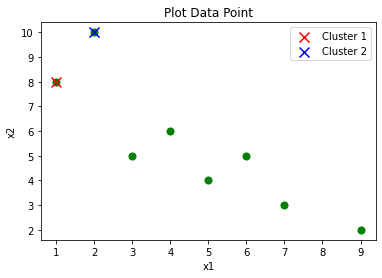

In [258]:
# Memisahkan data point berdasarkan kelompok
cluster1_points = X[:4]
cluster2_points = X[4:]

# Plotting data point dan centroid
plt.scatter(cluster1_points[:, 0], cluster1_points[:, 1], marker='o', color='green', s=50)
plt.scatter(cluster2_points[:, 0], cluster2_points[:, 1], marker='o', color='green', s=50)
plt.scatter(C[0], C[1], marker='x', color='red', label='Cluster 1', s=100)
plt.scatter(F[0], F[1], marker='x', color='blue', label='Cluster 2', s=100)

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot Data Point')

plt.show()

## 1.a

In [259]:
# Fungsi untuk menghitung jarak Euclidean antara dua titik
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Fungsi untuk melakukan clustering k-Means
def k_means_clustering(X, C, F):
    cluster_a = []
    cluster_b = []
    dist_a = []
    dist_b = []
    cluster = []
    
    for data in X:
        distance_a = euclidean_distance(data, C)
        distance_b = euclidean_distance(data, F)
        dist_a.append(distance_a)
        dist_b.append(distance_b)
        
        if distance_a < distance_b:
            cluster.append(data)
            cluster_a.append(data)
        else:
            cluster.append(data)
            cluster_b.append(data)
    
    return cluster, np.array(cluster_a), np.array(cluster_b), dist_a, dist_b

# Lakukan clustering awal
cluster, cluster_a, cluster_b, distance_a, distance_b = k_means_clustering(X, C, F)

# Tampilkan anggota cluster sesuai metode k-Means
list_data = []
print("Anggota Cluster A:")
for data in cluster_a:
    list_data.append(data)
    print(data)
    
print("\nAnggota Cluster B:")
for data in cluster_b:
    list_data.append(data)
    print(data)

Anggota Cluster A:
[3 5]
[7 3]
[1 8]
[5 4]
[4 6]
[6 5]
[9 2]

Anggota Cluster B:
[ 2 10]


In [260]:
import pandas as pd

# Menggabungkan data x1, x2, distance_a, distance_b, dan hasil cluster
data = np.column_stack((X, distance_a, distance_b, np.zeros(len(distance_a))))

# Mengisi hasil cluster dengan 0 atau 1 berdasarkan kondisi
for i in range(len(data)):
    if data[i, :2] in cluster_a:
        data[i, 4] = 0
    elif data[i, :2] in cluster_b:
        data[i, 4] = 1

# Membuat DataFrame dari data
data_new = pd.DataFrame(data, columns=['x1', 'x2', 'distance_a', 'distance_b', 'hasil_cluster'])

# Mengkonversi hasil_cluster menjadi tipe data integer
data_new['hasil_cluster'] = data_new['hasil_cluster'].astype(int)

# Menampilkan DataFrame
print(data_new)

    x1    x2  distance_a  distance_b  hasil_cluster
0  3.0   5.0    3.605551    5.099020              0
1  7.0   3.0    7.810250    8.602325              0
2  1.0   8.0    0.000000    2.236068              0
3  5.0   4.0    5.656854    6.708204              0
4  4.0   6.0    3.605551    4.472136              0
5  2.0  10.0    2.236068    0.000000              1
6  6.0   5.0    5.830952    6.403124              0
7  9.0   2.0   10.000000   10.630146              0


Text(0.5, 1.0, 'Plot Cluster')

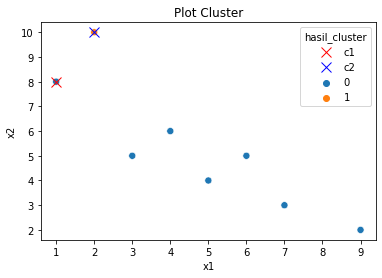

In [261]:
plt.plot(initial_centroids[0][0],initial_centroids[0][1],'x', markersize = 10, color='red', label ='c1')
plt.plot(initial_centroids[1][0],initial_centroids[1][1],'x', markersize = 10, color='blue', label ='c2')
sns.scatterplot(x='x1',
               y = 'x2',
               hue = 'hasil_cluster',
               s = 50,
               data=data_new)
plt.title('Plot Cluster')

## 1.b

In [262]:
# Update pusat cluster dengan algoritma k-Means
new_center_a = np.mean(cluster_a, axis=0)
new_center_b = np.mean(cluster_b, axis=0)

# Tampilkan pusat cluster yang baru
print("\nPusat Cluster Baru:")
print("Cluster A:", new_center_a)
print("Cluster B:", new_center_b)


Pusat Cluster Baru:
Cluster A: [5.         4.71428571]
Cluster B: [ 2. 10.]


In [263]:
# Lakukan clustering awal
cluster, cluster_a, cluster_b, distance_a, distance_b = k_means_clustering(X, new_center_a, new_center_b)

# Tampilkan anggota cluster sesuai metode k-Means
list_data = []
print("Anggota Cluster A:")
for data in cluster_a:
    list_data.append(data)
    print(data)
    
print("\nAnggota Cluster B:")
for data in cluster_b:
    list_data.append(data)
    print(data)

Anggota Cluster A:
[3 5]
[7 3]
[5 4]
[4 6]
[6 5]
[9 2]

Anggota Cluster B:
[1 8]
[ 2 10]


In [264]:
import pandas as pd

# Menggabungkan data x1, x2, distance_a, distance_b, dan hasil cluster
data = np.column_stack((X, distance_a, distance_b, np.zeros(len(distance_a))))

# Mengisi hasil cluster dengan 0 atau 1 berdasarkan kondisi
for i in range(len(data)):
    if data[i, :2] in cluster_a:
        data[i, 4] = 0
    elif data[i, :2] in cluster_b:
        data[i, 4] = 1      

# Membuat DataFrame dari data
data_new = pd.DataFrame(data, columns=['x1', 'x2', 'distance_a', 'distance_b', 'hasil_cluster'])

# Mengkonversi hasil_cluster menjadi tipe data integer
data_new['hasil_cluster'] = data_new['hasil_cluster'].astype(int)

# Menampilkan DataFrame
print(data_new)

    x1    x2  distance_a  distance_b  hasil_cluster
0  3.0   5.0    2.020305    5.099020              0
1  7.0   3.0    2.634156    8.602325              0
2  1.0   8.0    5.176477    2.236068              1
3  5.0   4.0    0.714286    6.708204              0
4  4.0   6.0    1.628822    4.472136              0
5  2.0  10.0    6.077728    0.000000              1
6  6.0   5.0    1.040016    6.403124              0
7  9.0   2.0    4.833978   10.630146              0


Text(0.5, 1.0, 'Centroid Baru')

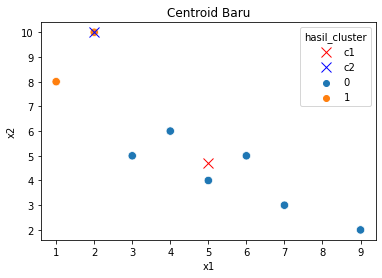

In [265]:
new_center = np.array([new_center_a,new_center_b])

plt.plot(new_center[0][0],new_center[0][1],'x', markersize = 10, color='red',label = 'c1')
plt.plot(new_center[1][0],new_center[1][1],'x', markersize = 10, color='blue',label = 'c2')
sns.scatterplot(x='x1',
               y = 'x2',
               hue = 'hasil_cluster',
                s = 70,
               data=data_new)
plt.title('Centroid Baru')

In [266]:
# Update pusat cluster dengan algoritma k-Means
def update_centroids(X, cluster_a, cluster_b):
    new_center_a = np.mean(cluster_a, axis=0)
    new_center_b = np.mean(cluster_b, axis=0)
    return new_center_a, new_center_b

# Melakukan iterasi K-Means dengan 100 iterasi
num_iterations = 100
for i in range(num_iterations):
    cluster, cluster_a, cluster_b, distance_a, distance_b = k_means_clustering(X, C, F)
    new_center_a, new_center_b = update_centroids(X, cluster_a, cluster_b)
    C, F = new_center_a, new_center_b

# Tampilkan anggota cluster sesuai metode k-Means
list_data = []
print("Anggota Cluster A:")
for data in cluster_a:
    list_data.append(data)
    print(data)

print("\nAnggota Cluster B:")
for data in cluster_b:
    list_data.append(data)
    print(data)

# Menggabungkan data x1, x2, distance_a, distance_b, dan hasil cluster
data = np.column_stack((X, distance_a, distance_b, np.zeros(len(distance_a))))

# Mengisi hasil cluster dengan 0 atau 1 berdasarkan kondisi
for i in range(len(data)):
    if data[i, :2] in cluster_a:
        data[i, 4] = 0
    elif data[i, :2] in cluster_b:
        data[i, 4] = 1

# Membuat DataFrame dari data
data_new = pd.DataFrame(data, columns=['x1', 'x2', 'distance_a', 'distance_b', 'hasil_cluster'])

# Mengkonversi hasil_cluster menjadi tipe data integer
data_new['hasil_cluster'] = data_new['hasil_cluster'].astype(int)

# Menampilkan DataFrame
print(data_new)

Anggota Cluster A:
[3 5]
[7 3]
[5 4]
[4 6]
[6 5]
[9 2]

Anggota Cluster B:
[1 8]
[ 2 10]
    x1    x2  distance_a  distance_b  hasil_cluster
0  3.0   5.0    2.793842    4.272002              0
1  7.0   3.0    1.771691    8.139410              0
2  1.0   8.0    6.039224    1.118034              1
3  5.0   4.0    0.687184    6.103278              0
4  4.0   6.0    2.477678    3.905125              0
5  2.0  10.0    6.890009    1.118034              1
6  6.0   5.0    0.897527    6.020797              0
7  9.0   2.0    3.975620   10.259142              0


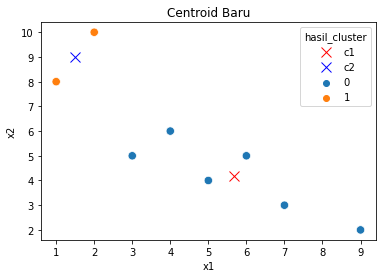

In [267]:
new_center = np.array([new_center_a, new_center_b])

plt.plot(new_center[0][0], new_center[0][1], 'x', markersize=10, color='red', label='c1')
plt.plot(new_center[1][0], new_center[1][1], 'x', markersize=10, color='blue', label='c2')
sns.scatterplot(x='x1', y='x2', hue='hasil_cluster', s=70, data=data_new)
plt.title('Centroid Baru')
plt.show()

## 1.c

In [273]:
from sklearn.metrics import adjusted_rand_score

# Menghitung Rand Index
true_labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Label sebenarnya
predicted_labels = data_new['hasil_cluster'].values  # Label hasil clustering
Rand_Index = rand_score(true_labels, predicted_labels) 
Adjusted_Rand_Index = adjusted_rand_score(true_labels, predicted_labels)

Rand Index: 0.42857142857142855
Adjusted Rand Index: -0.12


Text(0.5, 1.0, 'No 1c')

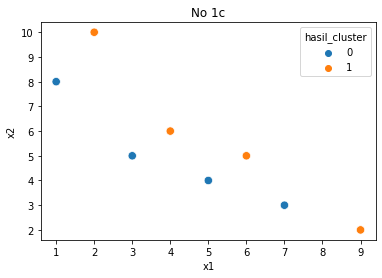

In [278]:
data_cluster = pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    'hasil_cluster' : true_labels,
})

sns.scatterplot(x='x1',
               y = 'x2',
               hue = 'hasil_cluster',
                s = 70,
               data=data_cluster,)
plt.title('No 1c')

In [279]:
# Menampilkan hasil Rand Index
print("Rand Index:", Rand_Index)
print("Adjusted Rand Index:", Adjusted_Rand_Index)

Rand Index: 0.42857142857142855
Adjusted Rand Index: -0.12


Rand Index: Nilai Rand Index mengukur kesamaan antara dua set label, yaitu label sebenarnya (ground truth) dan label hasil clustering. Rentang nilai Rand Index adalah dari 0 hingga 1, di mana 0 menunjukkan ketidaksamaan antara dua set label dan 1 menunjukkan kesamaan sempurna antara dua set label tersebut. Dalam kasus Anda, nilai Rand Index adalah 0.42857142857142855, yang menunjukkan tingkat kesamaan yang cukup rendah antara label sebenarnya dan label hasil clustering.

Adjusted Rand Index: Adjusted Rand Index adalah variasi dari Rand Index yang telah disesuaikan untuk memperhitungkan kemungkinan kebetulan dalam pengelompokan acak. Rentang nilai Adjusted Rand Index juga dari -1 hingga 1, di mana nilai -1 menunjukkan ketidaksamaan sempurna antara dua set label, 0 menunjukkan ketidaksesuaian yang diharapkan acak, dan 1 menunjukkan kesamaan sempurna antara dua set label tersebut. Dalam kasus Anda, nilai Adjusted Rand Index adalah -0.12, yang menunjukkan adanya ketidaksesuaian dan perbedaan yang signifikan antara label sebenarnya dan label hasil clustering.

Dari hasil evaluasi ini, dapat disimpulkan bahwa clustering yang dilakukan dengan metode k-Means dalam kasus ini tidak cocok atau memiliki kesesuaian yang rendah dengan label sebenarnya. Nilai Adjusted Rand Index yang negatif menunjukkan bahwa kesesuaian antara dua set label tersebut jauh lebih rendah daripada yang diharapkan dari hasil pengelompokan acak.

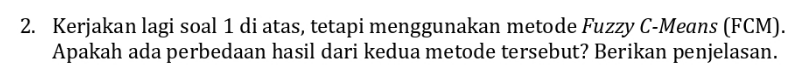

In [289]:
x1 = np.array([3, 7, 1, 5, 4, 2, 6, 9])
x2 = np.array([5, 3, 8, 4, 6, 10, 5, 2])

X = np.column_stack((x1, x2))  # Menggabungkan x1 dan x2 menjadi X

In [290]:
data_df = pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
})
n = data_df.shape[0]
d = data_df.shape[1]
k = 2
m = 2

In [291]:
def initWeight(n):
    np.random.seed(1)
    weight = np.random.dirichlet(np.ones(k),n)
    weight_arr = np.array(weight)
    return weight_arr.T

In [292]:
W1 = initWeight(n)
assign1 = np.rint(W1).astype(int)
data_fcm1 = pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    'W' : W1[0,:],
    'hasil_cluster' : assign1[0,:],
})
data_fcm1

,x1,x2,W,hasil_cluster
0,3,5,0.297511,0
1,7,3,0.000318,0
2,1,8,0.620945,1
3,5,4,0.327119,0
4,4,6,0.395066,0
5,2,10,0.319758,0
6,6,5,0.098021,0
7,9,2,0.024405,0


Text(0.5, 1.0, 'Plot dengan Weight Random')

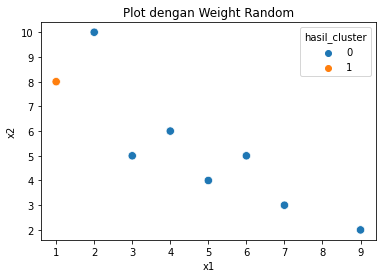

In [293]:
sns.scatterplot(x='x1',
               y = 'x2',
               hue = 'hasil_cluster',
                s = 70,
               data=data_fcm1,)
plt.title('Plot dengan Weight Random')

In [295]:
def Centroid(w,data):
    V = []
    for i in range(k): #2
        temp = []
        for j in range(2): #2
            atas = []
            bawah = []
            for z in range(n): #4

                w_kali = w[i][z]
                data_kali = data[z,j] 
                w_2 = w_kali**m

                atas.append(w_2 *  data_kali)
                bawah.append(w_2) 

            sum_a = np.sum(atas)
            sum_b = np.sum(bawah)
            V_ = sum_a/sum_b
            temp.append(V_)
        V.append(temp)
    return np.array(V)  

In [296]:
C1 = Centroid(W1,data)
print(C1)

[[2.44574879 7.01882137]
 [5.70539417 4.53105651]]


Text(0.5, 1.0, 'Menentukan Centroid')

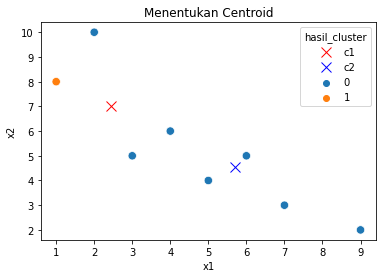

In [298]:
plt.plot(C1[0][0],C1[0][1],'x', markersize = 10, color='red',label = 'c1')
plt.plot(C1[1][0],C1[1][1],'x', markersize = 10, color='blue',label = 'c2')
sns.scatterplot(x='x1',
               y = 'x2',
               hue = 'hasil_cluster',
                s=70,
               data=data_fcm1,)
plt.title('Menentukan Centroid')

In [299]:
def dist_cent(all_vals, centroids):
    all_dist = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            #euclidean distance
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)
            
        all_dist.append(dist_point_clust)

    return np.array(all_dist)

In [301]:
D1 = dist_cent(X,C1)
print(D1)

[[2.09352195 2.74573589]
 [6.07388914 2.00502826]
 [1.74725529 5.84587916]
 [3.95442559 0.88295071]
 [1.85841164 2.25081412]
 [3.01431883 6.60600399]
 [4.08758381 0.55380555]
 [8.25510611 4.15459681]]


In [302]:
def updateW(dist):
    W = []
    for i in range(dist.shape[0]):
        W_temp = []
        for j in range(dist.shape[1]):
            temp = []
            for k in range(dist.shape[1]):
                atas = dist[i][j]**2
                bawah = dist[i][k]**2
                bagi = atas/bawah
                temp.append(bagi)
            sum_temp = np.sum(temp)
            power_temp = np.power(sum_temp,1/(m-1))
            W_temp.append(1/power_temp)
        W.append(W_temp)
    
    return np.array(W).T

In [303]:
W2 = updateW(D1)
assign2 = np.rint(W2).astype(int)

data_fcm2 = pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    'W' : W2[0,:],
    'cluster' : assign2[0,:],
})

data_fcm2

,x1,x2,W,cluster
0,3,5,0.632371,1
1,7,3,0.098262,0
2,1,8,0.917993,1
3,5,4,0.047487,0
4,4,6,0.594630,1
5,2,10,0.827671,1
6,6,5,0.018025,0
7,9,2,0.202098,0


Text(0.5, 1.0, 'Menentukan Keanggotan Baru')

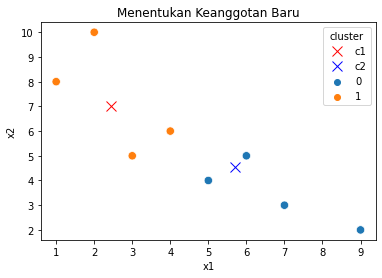

In [304]:
plt.plot(C1[0][0],C1[0][1],'x', markersize = 10, color='red',label = 'c1')
plt.plot(C1[1][0],C1[1][1],'x', markersize = 10, color='blue',label = 'c2')
sns.scatterplot(x='x1',
               y = 'x2',
               hue = 'cluster',
                s = 70,
               data=data_fcm2,)
plt.title('Menentukan Keanggotan Baru')

In [310]:
n_iter = 100
W = W2
for i in range(n_iter):
    C = findCentroid(W,X)
    D = dist_cent(X,C)
    W = updateW(D)
assign = np.rint(W).astype(int)
data_fcm3 = pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    'W' : W[0,:],
    'cluster' : assign[0,:],
})
data_fcm3

,x1,x2,W,cluster
0,3,5,0.591502,1
1,7,3,0.015313,0
2,1,8,0.975623,1
3,5,4,0.084998,0
4,4,6,0.607702,1
5,2,10,0.933670,1
6,6,5,0.075922,0
7,9,2,0.100675,0


Text(0.5, 1.0, 'FCM setelah 100 iterasi')

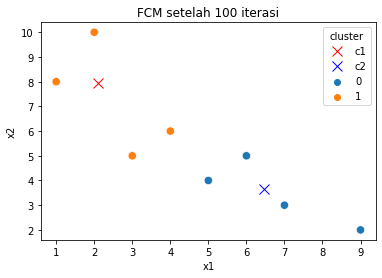

In [311]:
plt.plot(C[0][0],C[0][1],'x', markersize = 10, color='red',label = 'c1')
plt.plot(C[1][0],C[1][1],'x', markersize = 10, color='blue',label = 'c2')
sns.scatterplot(x='x1',
               y = 'x2',
               hue = 'cluster',
                s = 70,
               data=data_fcm3,)
plt.title('FCM setelah 100 iterasi')